<style>
    body { font-family: 'Comic Sans MS', cursive, sans-serif;
    }

</style>



# Check simulations from Jonas - EPOS-LHC

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mass_fractions import *


plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.rm"] = "Comic Sans MS"
plt.rcParams["mathtext.it"] = "Comic Sans MS:italic"
plt.rcParams["mathtext.bf"] = "Comic Sans MS:bold"


input_path = '/mnt/c/Users/paolo/Desktop/LAVORO/data_files/aixnet_sib_all_data.npz'
data = np.load(input_path, allow_pickle=True)

print(data.files)
print(len(data['dnn_xmax']))

dd = {key: data[key] for key in data.files}

print(dd.keys())

data_mask = flatten_distr(dd['energy'])
dd = dict_cutter(dd, data_mask)
# print(dd.items())

['dnn_axis', 'dnn_core', 'dnn_energy', 'dnn_xmax', 'event_id', 'auger_id', 'sd_id', 'is_saturated', 'core', 'axis', 'energy', 'xmax', 'element', 'mass', 'merit', 'fd_energy', 'fd_axis', 'sd_energy', 'sd_axis', 'sd_galactic_latitude', 'sd_galactic_longitude', 'sd_core', 'univ_energy', 'univ_axis', 'delta_mean_delta', 'delta_xmax', 'delta_energy', 'muon_number']
443543
dict_keys(['dnn_axis', 'dnn_core', 'dnn_energy', 'dnn_xmax', 'event_id', 'auger_id', 'sd_id', 'is_saturated', 'core', 'axis', 'energy', 'xmax', 'element', 'mass', 'merit', 'fd_energy', 'fd_axis', 'sd_energy', 'sd_axis', 'sd_galactic_latitude', 'sd_galactic_longitude', 'sd_core', 'univ_energy', 'univ_axis', 'delta_mean_delta', 'delta_xmax', 'delta_energy', 'muon_number'])


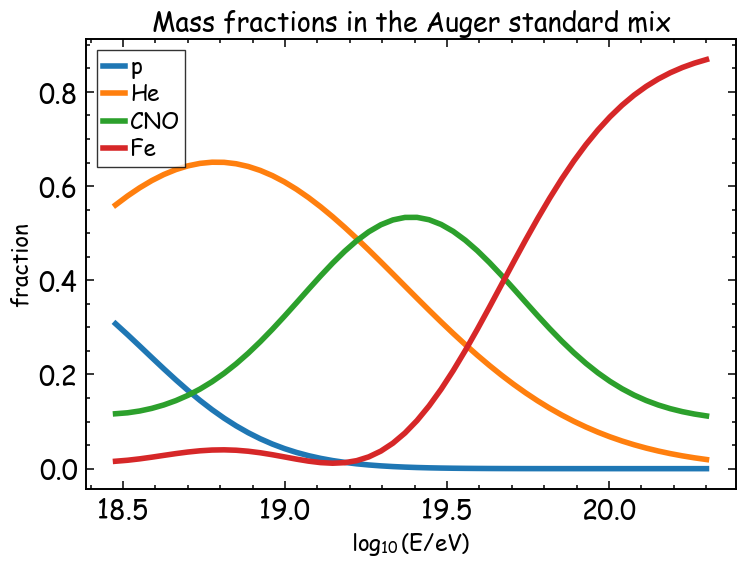

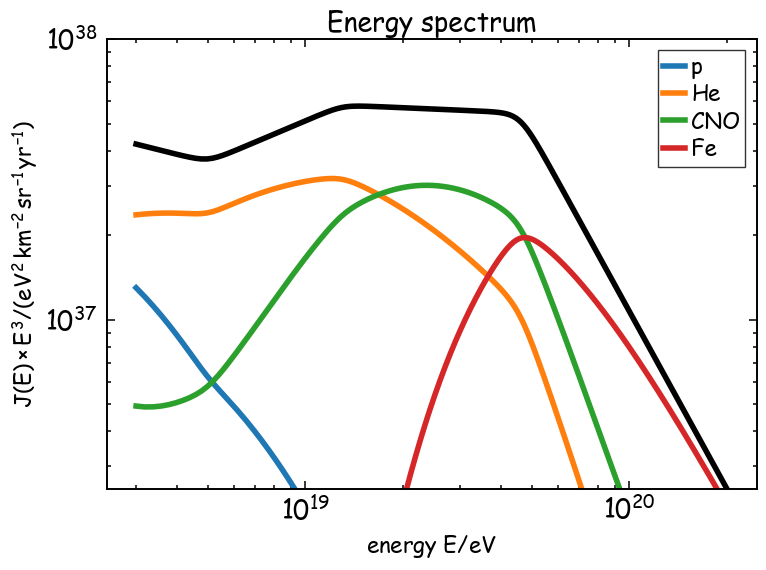

In [8]:
names = {'p': 1, 'He': 4, 'CNO':16, 'Fe': 56}

mf = mass_fractions()
ene = np.linspace(np.log10(3e18),np.log10(200e18))

plt.figure(figsize=(10,6))
for name in names:
    if name == 'Fe':
        plt.plot(ene, 1 - (mf.fraction_func('p', ene) + mf.fraction_func('He', ene) + mf.fraction_func('CNO', ene)), label=f'{name}', linewidth=4)
    else:    
        plt.plot(ene, mf.fraction_func(name, ene), label=f'{name}', linewidth=4)

plt.xlabel(r'$\log_{10}(E/eV)$')
plt.ylabel('fraction')
plt.title('Mass fractions in the Auger standard mix')
plt.legend()
plt.show()

es = energy_spectrum()
ene2 = np.linspace((3e18),(200e18), 1000)
ene3 = np.log10(ene2)

plt.figure(figsize=(10,6))
for name in names:
    if name == 'Fe':
        func = es.spectrum_func(ene2)*np.power(ene2, 3)*(1 - (mf.fraction_func('p', ene3) + mf.fraction_func('He', ene3) + mf.fraction_func('CNO', ene3)))
        plt.plot(ene2, func, label=f'{name}', linewidth=4)
    else:
        func = es.spectrum_func(ene2)*np.power(ene2, 3)*mf.fraction_func(name, ene3)    
        plt.plot(ene2, func, label=f'{name}', linewidth=4)
plt.plot(ene2, es.spectrum_func(ene2)*np.power(ene2, 3), color='k', linewidth=4)
plt.xlabel(r'energy $E / eV$')
plt.ylabel(r'$J(E)\times E^3 / (eV^2\, km^{-2} \, sr^{-1} \, yr^{-1})$')
plt.title('Energy spectrum')
plt.xscale('log')
plt.yscale('log')
plt.ylim(np.min(es.spectrum_func(ene2)*np.power(ene2, 3)), 1e38)
plt.legend()
plt.show()


369514


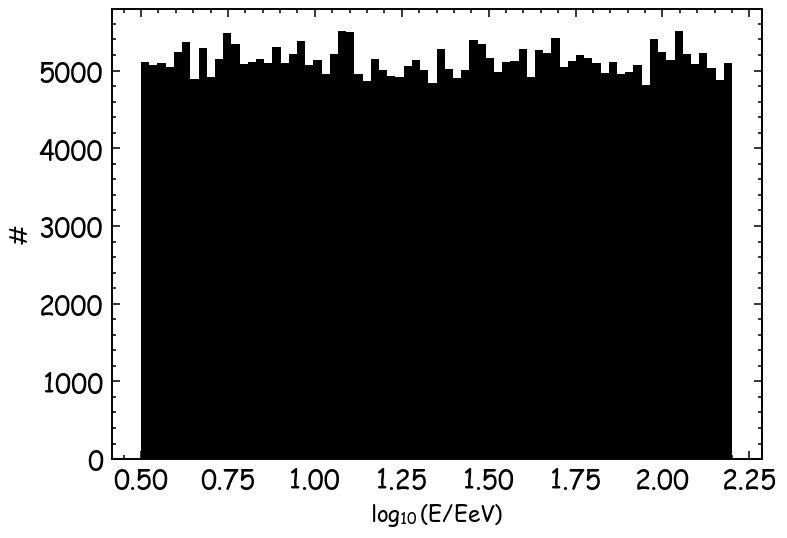

In [9]:
print(len(dd['energy']))

plt.figure(figsize=(10,6))
# plt.hist(np.log10(dd['energy'][dd['mass']!=6]*1e18), color='k')
plt.hist(np.log10(dd['energy']), color='k')
# plt.plot(bin_centers, hist_2, color='k', linewidth=4)
plt.xlabel(r'$\log_{10}(E/EeV)$')
plt.ylabel(r'#')
#plt.xscale('log')
#plt.yscale('log')
plt.show()


In [10]:
# first I extract the spectrum, then the mass distribution
mass_mask = mf.extract_all_fractions(np.log10(dd['energy']*1e18), dd['mass'])
#display(mass_mask)
dd = dict_cutter(dd, mass_mask)

# spectrum_mask = es.spectrum_fraction(dd['energy']*1e18)
# dd = dict_cutter(dd, spectrum_mask)

136713


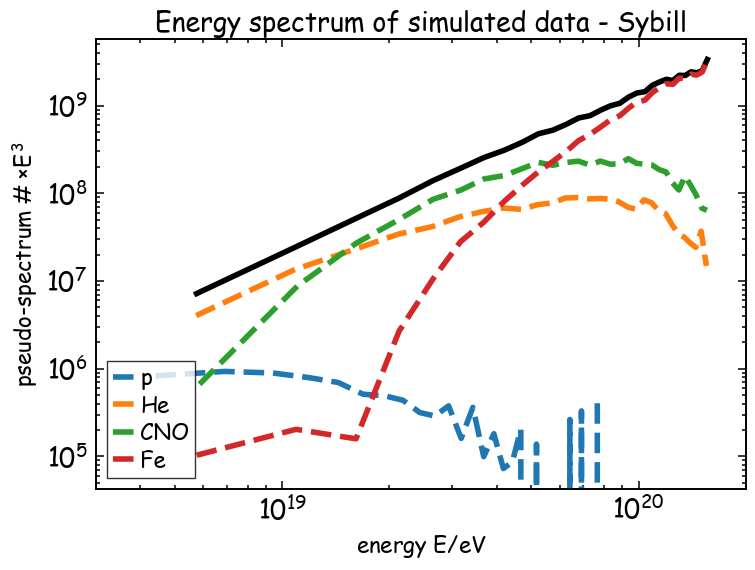

In [11]:

print(len(dd['auger_id']))

hist, bin_edges = np.histogram(dd['energy'], bins=30)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
hist_2 = hist*np.power(bin_centers, 3)


plt.figure(figsize=(10,6))
plt.title('Energy spectrum of simulated data - Sybill')
# plt.hist(np.log10(dd['energy'][dd['mass']==56]*1e18), color='k')
# plt.hist(dd['energy'], color='k')
plt.plot(bin_centers*1e18, hist_2, color='k', linewidth=4)
for name in names:
    hist, bin_edges = np.histogram(dd['energy'][dd['mass']==names[name]], bins=30)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    hist_2 = hist*np.power(bin_centers, 3)
    plt.plot(bin_centers*1e18, hist_2, linewidth=4, ls='--', label=f'{name}')
plt.xlabel('energy $E / eV$')
plt.ylabel(r'pseudo-spectrum # $\times E^3$')
#plt.ylim(4e3, 5e6)
plt.xlim(3e18, 200e18)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower left')
plt.show()

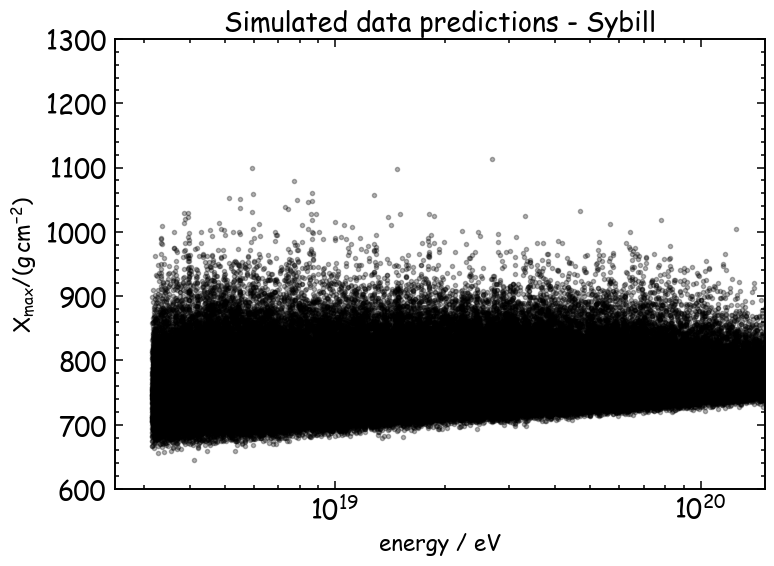

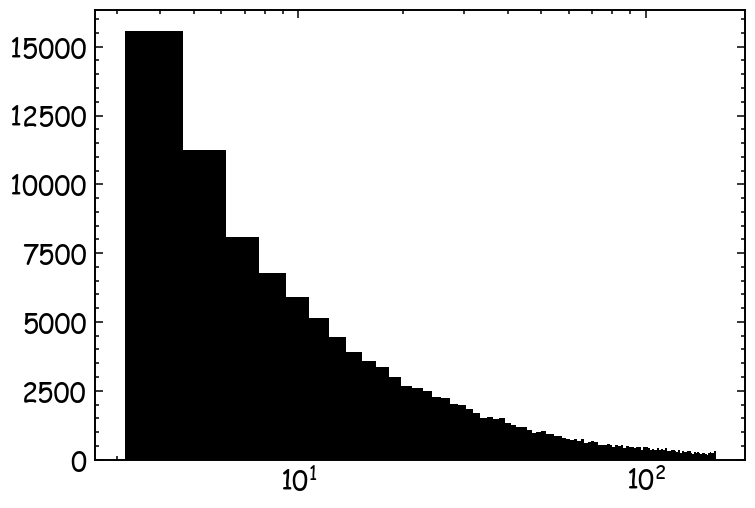

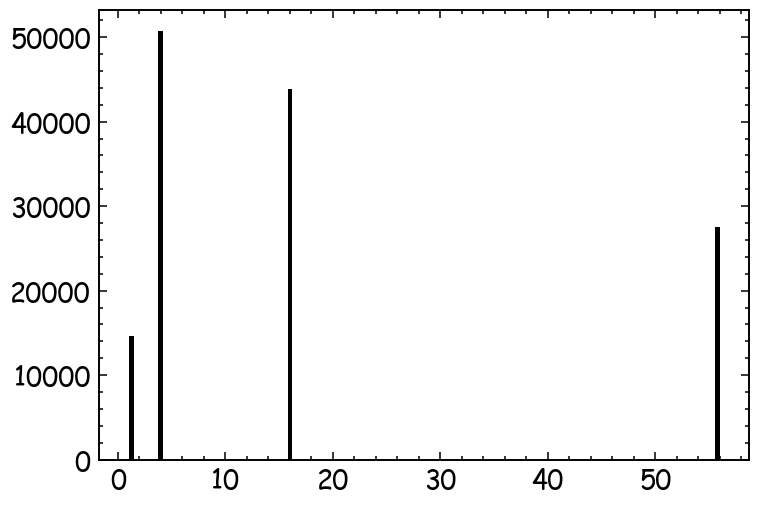

[16. 16. 16. ... 56. 56. 56.]


In [12]:
plt.figure(figsize=(10,6))
# plt.title('Comic Sans!!!')
plt.title('Simulated data predictions - Sybill')
plt.scatter(dd['energy']*1e18, dd['dnn_xmax'], alpha=0.3, color='k')
plt.xlabel(r'energy / eV')
plt.ylabel(r'$X_\mathrm{max} / (g \, cm^{-2})$')
plt.xscale('log')
plt.ylim(600, 1300)
plt.xlim(2.5e18, 150e18)
plt.show()


plt.figure(figsize=(10,6))
plt.hist(dd['energy'], color='k')
plt.xscale('log')
plt.show()

plt.figure(figsize=(10,6))
plt.hist(dd['mass'], color='k')
# plt.xscale('log')
plt.show()

print(dd['mass'][dd['mass']>4])
